# CLIP feature extraction

In [3]:
import numpy as np
import torch
import clip
from tqdm import tqdm
from prompt import Prompt_classes
import torch.optim as optim
from torch.utils.data import DataLoader


from torchvision.datasets import  MNIST, CIFAR10, SVHN, CIFAR100, ImageFolder
import torchvision.transforms as transforms
import torchvision


from PIL import Image
from torch.autograd import Variable

# from figure import make_figure

##########seed############
import torch
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)
###############

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

print("Torch version: ", torch.__version__)

print(clip.available_models())

model, preprocess = clip.load('ViT-B/32')

input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)


Torch version:  1.12.1
['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:
for param in model.visual.parameters():
    param.requires_grad = False

## CIFAR10

In [ ]:
cifar10 = CIFAR10(root='/data/mawjdgus', train=False, download=False, transform=preprocess)

In [66]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar10)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

10000it [01:31, 109.64it/s]


## CIFAR100

In [69]:
cifar100 = CIFAR100(root='/data/mawjdgus', train=False, download=False, transform=preprocess)

In [70]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar100)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

10000it [01:30, 110.50it/s]


## SVHN

In [71]:
svhn = SVHN(root='/data/mawjdgus', split='test', download=False, transform=preprocess)

In [ ]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(svhn)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

# TSNE plot

## CIFAR10

In [149]:
cifar10 = CIFAR10(root='/data/mawjdgus', train=False, download=False, transform=preprocess)

In [150]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar10)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    ## normalization ##
#     image_feature /= image_feature.norm()
    ###################
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

10000it [01:31, 109.79it/s]


In [151]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar10_tsne = tsne.fit_transform(image_features.cpu().numpy())

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


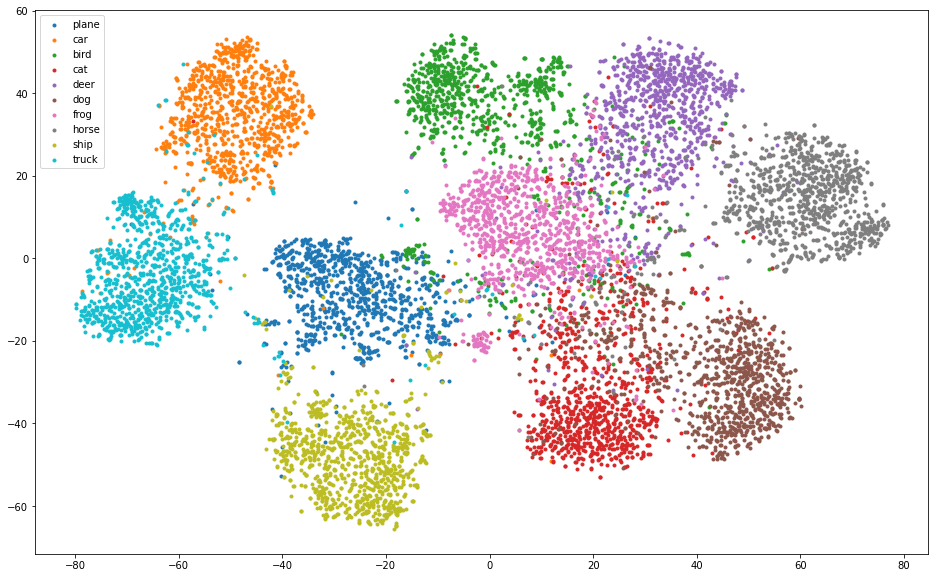

In [152]:
plt.figure(figsize=(16,10))
cifar10 = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar10):
    idx = np.where(image_labels == i)
    plt.scatter(cifar10_tsne[idx, 0], cifar10_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()

## TEXT Embedding

In [170]:
text = clip.tokenize(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']).to(device)

In [171]:
with torch.no_grad():
    text_features = model.encode_text(text)
text_features = text_features.cpu().numpy()

In [172]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar10_text_tsne = tsne.fit_transform(text_features)

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


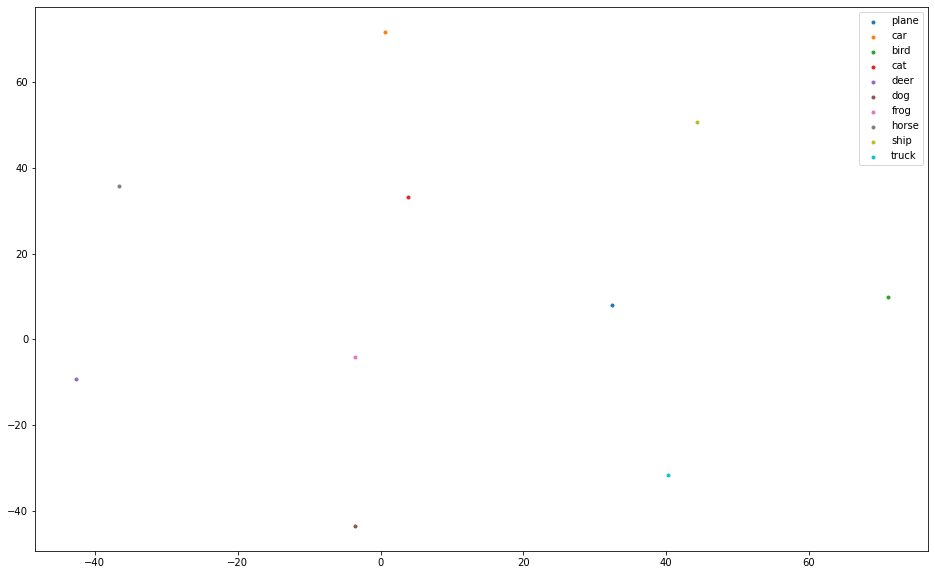

In [175]:
plt.figure(figsize=(16,10))
cifar10 = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, label in zip(range(10), cifar10):
    idx = i
    plt.scatter(cifar10_text_tsne[idx, 0], cifar10_text_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()

## CIFAR100

In [176]:
cifar100 = CIFAR100(root='/data/mawjdgus', train=False, download=False, transform=preprocess)

In [177]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar100)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

10000it [01:29, 111.23it/s]


In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar100_tsne = tsne.fit_transform(image_features.cpu().numpy())

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


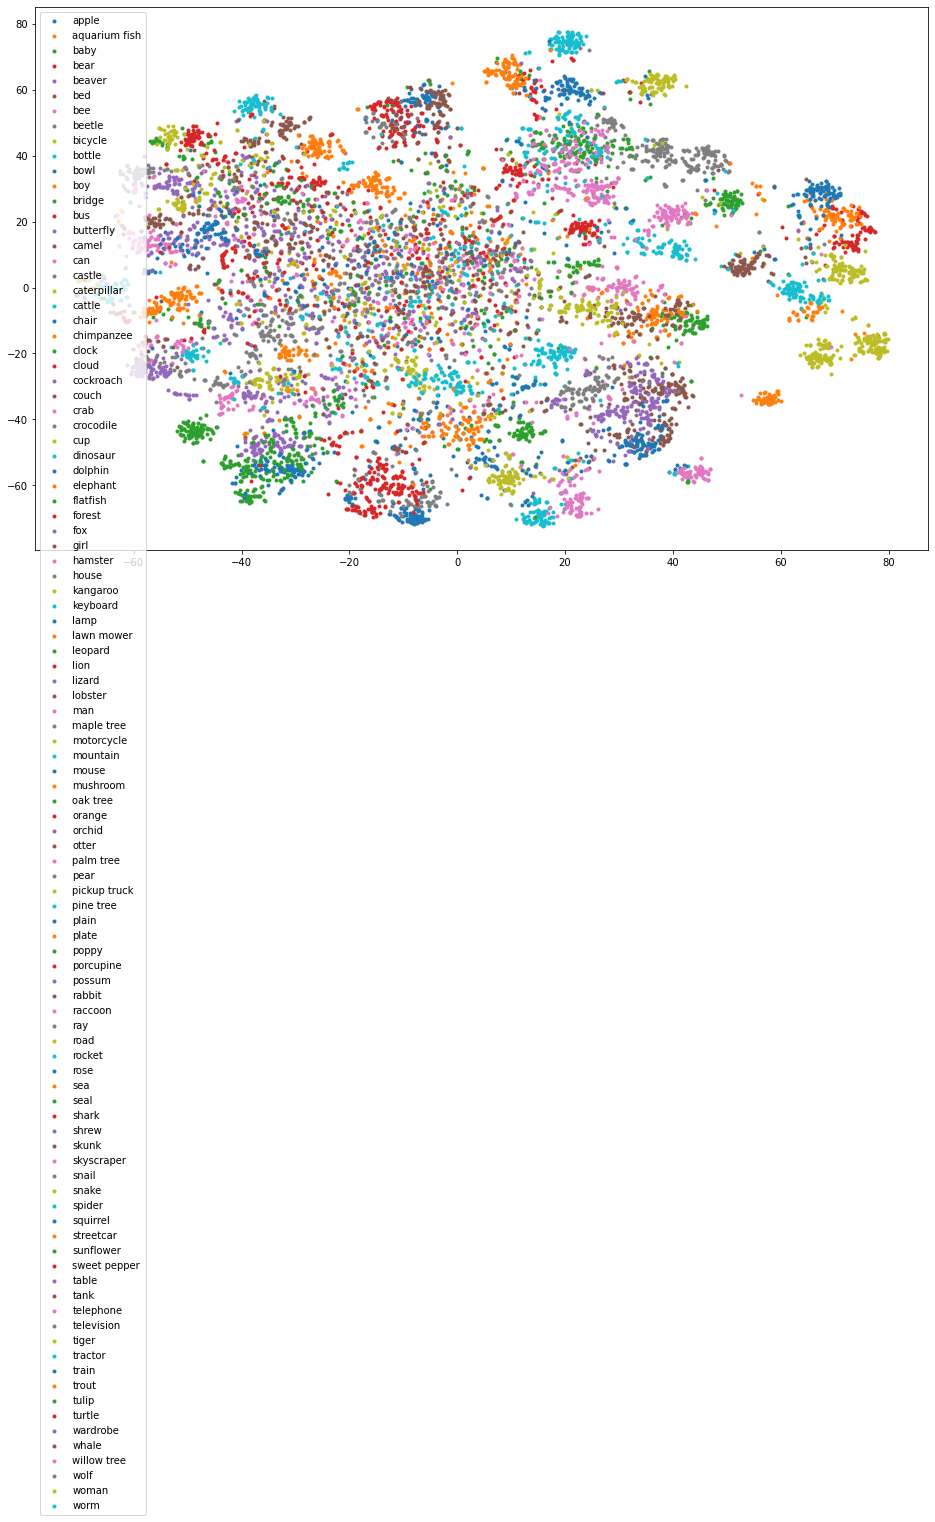

In [73]:
plt.figure(figsize=(16,10))
cifar100 = [
    'apple',
    'aquarium fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'keyboard',
    'lamp',
    'lawn mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak tree',
    'orange',
    'orchid',
    'otter',
    'palm tree',
    'pear',
    'pickup truck',
    'pine tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow tree',
    'wolf',
    'woman',
    'worm',
]

for i, label in zip(range(100), cifar100):
    idx = np.where(image_labels == i)
    plt.scatter(cifar100_tsne[idx, 0], cifar100_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()

## TEXT Embedding

In [180]:
text = clip.tokenize(cifar100).to(device)

In [181]:
with torch.no_grad():
    text_features = model.encode_text(text)
text_features = text_features.cpu().numpy()

In [182]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar100_text_tsne = tsne.fit_transform(text_features)

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


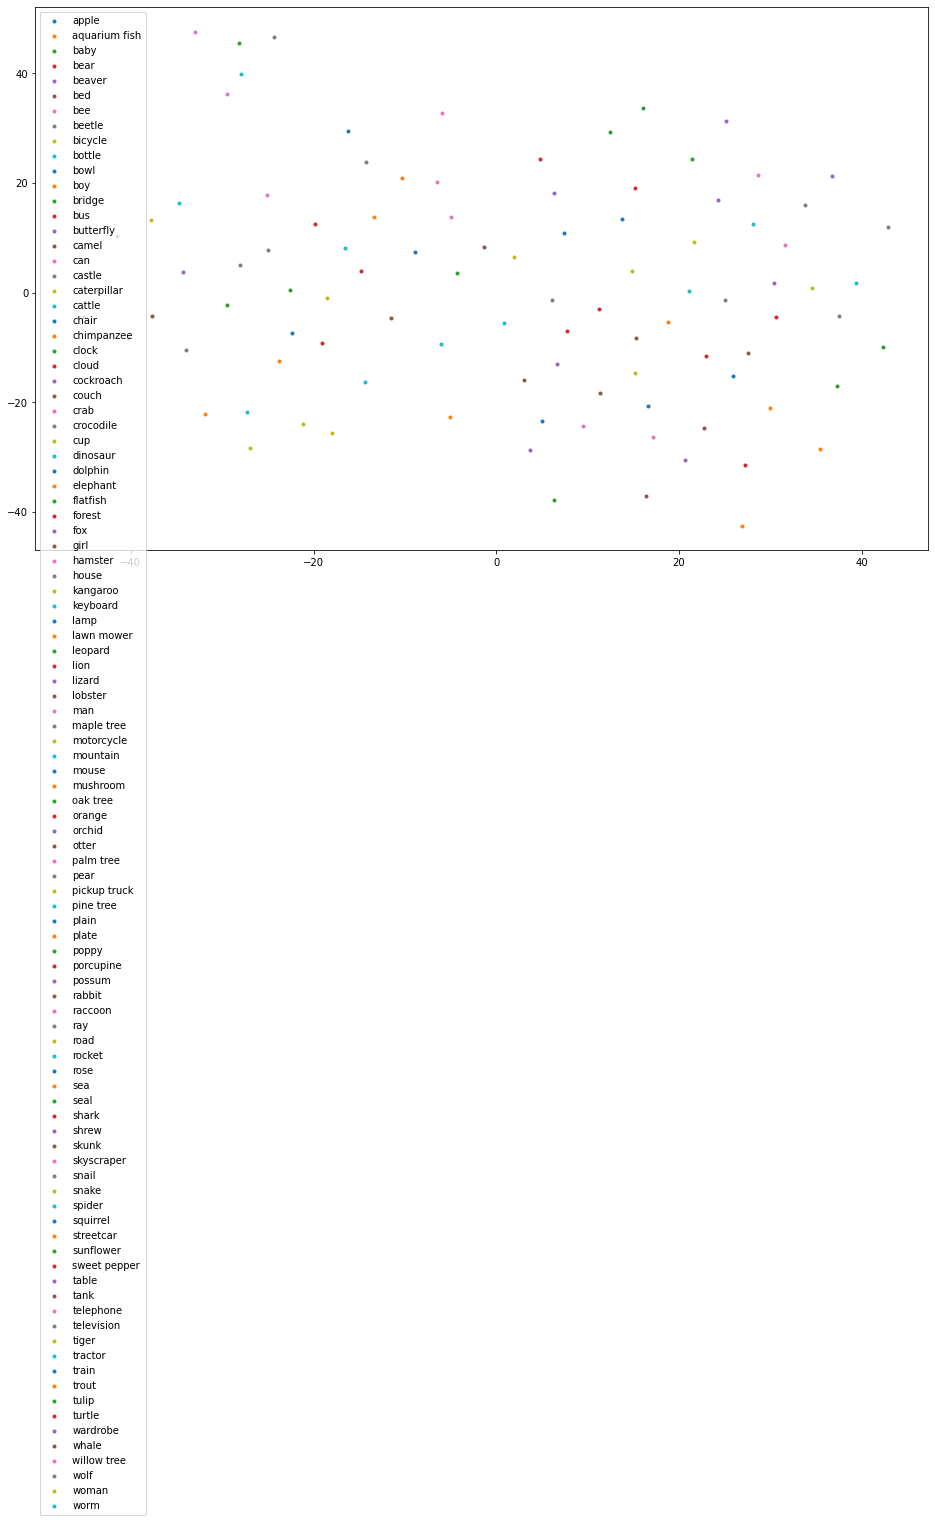

In [185]:
plt.figure(figsize=(16,10))
for i, label in zip(range(100), cifar100):
    idx = i
    plt.scatter(cifar100_text_tsne[idx, 0], cifar100_text_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()

## CIFAR60


In [75]:
cifar60 = ImageFolder(root='/data/cifar100-based/cifar60/eval/', transform=preprocess)

In [76]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar60)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

4000it [00:40, 97.76it/s] 


In [77]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar60_tsne = tsne.fit_transform(image_features.cpu().numpy())

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


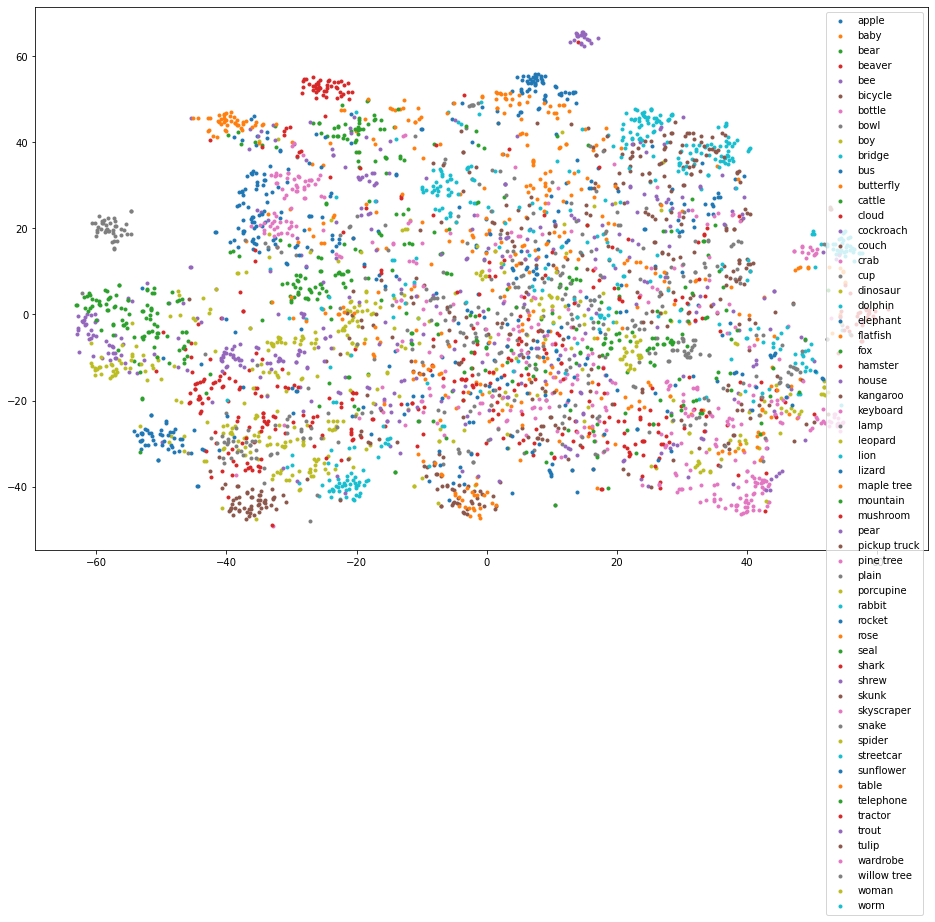

In [79]:
cifar60= [
        'apple',
        'baby',
        'bear',
        'beaver',
        'bee',
        'bicycle',
        'bottle',
        'bowl',
        'boy',
        'bridge',
        'bus',
        'butterfly',
        'cattle',
        'cloud',
        'cockroach',
        'couch',
        'crab',
        'cup',
        'dinosaur',
        'dolphin',
        'elephant',
        'flatfish',
        'fox',
        'hamster',
        'house',
        'kangaroo',
        'keyboard',
        'lamp',
        'leopard',
        'lion',
        'lizard',
        'maple tree',
        'mountain',
        'mushroom',
        'pear',
        'pickup truck',
        'pine tree',
        'plain',
        'porcupine',
        'rabbit',
        'rocket',
        'rose',
        'seal',
        'shark',
        'shrew',
        'skunk',
        'skyscraper',
        'snake',
        'spider',
        'streetcar',
        'sunflower',
        'table',
        'telephone',
        'tractor',
        'trout',
        'tulip',
        'wardrobe',
        'willow tree',
        'woman',
        'worm',
    ]
plt.figure(figsize=(16,10))
for i, label in zip(range(60), cifar60):
    idx = np.where(image_labels == i)
    plt.scatter(cifar60_tsne[idx, 0], cifar60_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()

## CIFAR40

In [80]:
cifar40 = ImageFolder(root='/data/cifar100-based/cifar40/eval/', transform=preprocess)

In [81]:
image_features = []
image_labels = []
for i, (image, label) in tqdm(enumerate(cifar40)):
    image = image.to(device)
    image_feature = model.encode_image(image.unsqueeze(0))
    image_features.append(image_feature)
    image_labels.append(label)
image_features = torch.stack(image_features, dim=1).to(device)
image_features = image_features.squeeze()
image_labels = np.array(image_labels)

4000it [00:37, 107.26it/s]


In [82]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(random_state=0)
cifar40_tsne = tsne.fit_transform(image_features.cpu().numpy())

/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mawjdgus/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


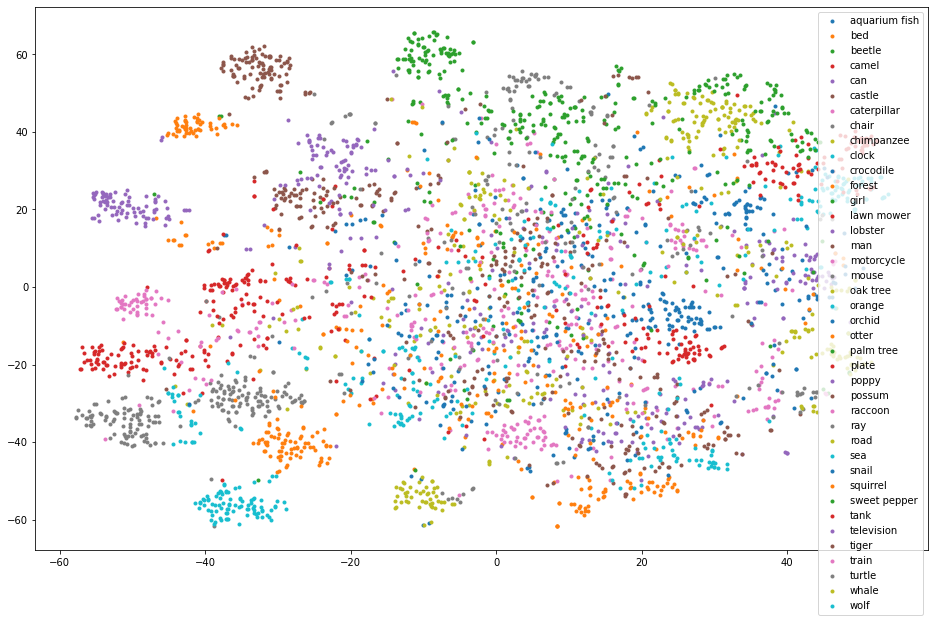

In [84]:
cifar40 = [
        'aquarium fish',
        'bed',
        'beetle',
        'camel',
        'can',
        'castle',
        'caterpillar',
        'chair',
        'chimpanzee',
        'clock',
        'crocodile',
        'forest',
        'girl',
        'lawn mower',
        'lobster',
        'man',
        'motorcycle',
        'mouse',
        'oak tree',
        'orange',
        'orchid',
        'otter',
        'palm tree',
        'plate',
        'poppy',
        'possum',
        'raccoon',
        'ray',
        'road',
        'sea',
        'snail',
        'squirrel',
        'sweet pepper',
        'tank',
        'television',
        'tiger',
        'train',
        'turtle',
        'whale',
        'wolf',
    ]
plt.figure(figsize=(16,10))
for i, label in zip(range(40), cifar40):
    idx = np.where(image_labels == i)
    plt.scatter(cifar40_tsne[idx, 0], cifar40_tsne[idx, 1], marker='.', label= label)
plt.legend()
plt.show()